#  YOLO V5

YOLOv5 - это семейство моделей обнаружения объектов со сложным масштабированием, подготовленных как дистрибутив на основе PyTorch. Модели предобучены на наборе данных COCO. Дистрибутив Yolo включает простые функции для тренировки, тестирования и валидирования моделей на произвольных наборах данных, а также возможности создания собственных моделей и их экспорта в другие популярные форматы, такие как ONNX, CoreML и TFLite.


![](https://github.com/ultralytics/yolov5/releases/download/v1.0/model_plot.png)


Мы настоятельно рекомендуем выполнять данную работу в Google Colab.

## Import

In [4]:
import cv2
import torch
from PIL import Image
import matplotlib.pyplot as plt
import IPython
from IPython import display


Загрузим официальный репозиторий с моделью и установим все требования.

In [5]:
%cd /content/
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt
try:
    import yolov5
except:
    pass
else:
    display.clear_output()

In [7]:
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.10.0+cu111 (CPU)


Теперь вы можете проверить, что на вашей виртуальной машине есть репозиторий, как показано ниже.

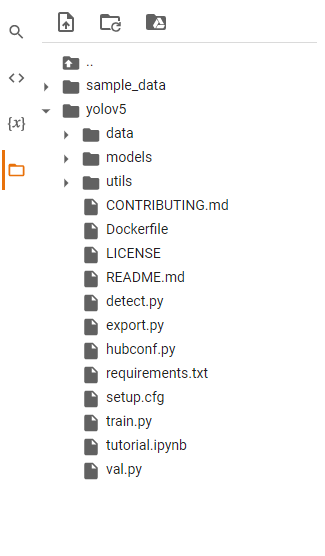

Также мы можем проверить это с помощью команд bash 

In [8]:
!pwd
!ls 

CONTRIBUTING.md  export.py   README.md	       train.py        yolov5
data		 hubconf.py  requirements.txt  tutorial.ipynb  yolov5s.pt
detect.py	 LICENSE     runs	       utils	       yolov5x.pt
Dockerfile	 models      setup.cfg	       val.py


Мы можем проверить, что Yolo работает, используя следующий код

detect: weights=['yolov5s.pt'], source=data/images, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-84-gdef7a0f torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.283s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 1 tie, Done. (0.215s)
Speed: 2.2ms pre-process, 248.9ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


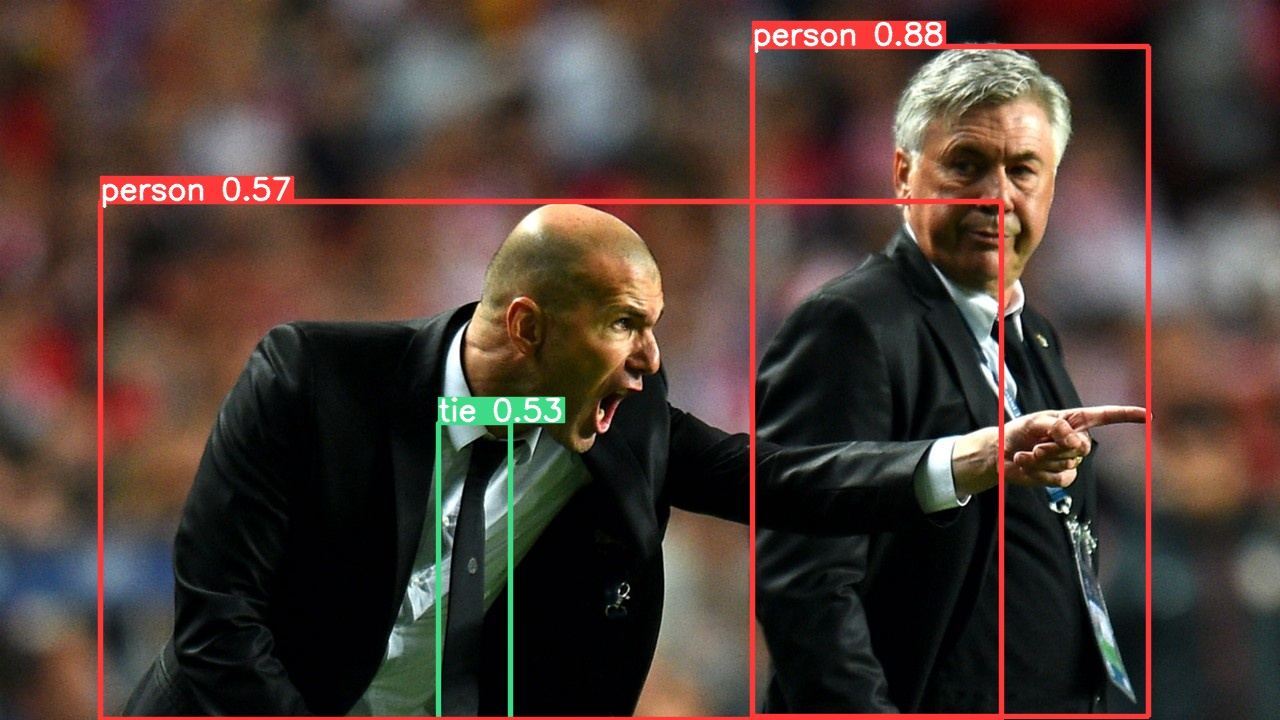

In [10]:
!rm -r -f /content/yolov5/runs/detect/*

!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images

display.Image(filename='/content/yolov5/runs/detect/exp/zidane.jpg', width=600)

## COCO Dataset validation



Во-первых, мы можем проверить, как YOLO будет работать с набором данных COCO. <br>
Для тестов COCO воспользуемся скриптом val.py.
<br> Скрипт можно вызвать со следующими аргументами: <ul>
<li><b>'--data'</b>, default=ROOT / 'data/coco128.yaml',  'путь к файлу вида dataset.yaml'
<li> <b> '--weights' </b>, nargs = '+', default = ROOT / 'yolov5s.pt', 'model.pt path (s)'
     <li> <b> '--batch-size' </b>, по умолчанию = 32, 'размер партии'
     <li> <b> '--imgsz', '--img', '--img-size' </b>,, по умолчанию = 640, 'размер вывода (в пикселях)'
     <li> <b> '--conf-thres' </b>, по умолчанию = 0,001, 'порог достоверности'
    <li> <b> '--iou-thres' </b>, по умолчанию = 0,6, 'Порог NMS IoU'
     <li> <b> '--task' </b>, default = 'val', 'train, val, test, speed or study'
     <li> <b> '--device' </b>, default = '', 'cuda device, т.е. 0 или 0,1,2,3 или cpu'
     <li> <b> '--single-cls' </b>, 'рассматривать как набор данных одного класса'
     <li> <b> '--augment' </b>, 'расширенный вывод'
     <li> <b> '--verbose' </b>, 'сообщить MAP по классам'
     <li> <b> '--save-txt' </b>, 'сохранять результаты в *.txt'
     <li> <b> '--save-hybrid' </b>, 'сохранить гибридные результаты метки + прогноза в * .txt'
     <li> <b> '--save-conf' </b>, 'сохранить достоверность в ярлыках --save-txt'
     <li> <b> '--save-json' </b>, 'сохранить файл результатов COCO-JSON'
     <li> <b> '--project' </b>, по умолчанию = ROOT/'run/ val', 'save to project / name'
     <li> <b> '--name' </b>, default = 'exp', 'сохранить в проект / имя'
     <li> <b> '--exist-ok' </b>, 'существующий проект / имя в порядке, без увеличения'
     <li> <b> '--half' </b>, 'использовать вывод половинной точности FP16'
     <li> <b> '--dnn' </b>, 'использовать OpenCV DNN для вывода ONNX'
</ul>


Для проверки мы будем использовать маленькую модель  `yolov5s.pt` 

*Примечание * <ul>

<li> <b> Результаты проверки </b> сохраняются в <code> 'run/val/' </code> с увеличивающимися номерами каталога выполнения, то есть <code> 'run/val/ exp2', 'run/val/exp3'</code> и т.д.

<li> Вместо использования полного набора данных COCO мы можем проверить результаты на уменьшенной копии этого набора <code> COCO128</code>.
    
<li> <b> Предварительно обученные модели </b> загружаются автоматически из последней версии репозитория YOLOv5, вы можете найти ее в `/yolo/models/'.
    
<li> <b> Наборы данных </b>, доступные для автоматической загрузки, включают: <code> COCO, COCO128, VOC, Argoverse, VisDrone, GlobalWheat, xView, Objects365, SKU-110K </code>.
    
<li> Вы можете найти всю доступную информацию о текущем состоянии Yolov5, используя страницу информации о  релизах <a href="https://github.com/ultralytics/yolov5/releases/">: 
    https://github.com/ultralytics/yolov5/Release/ </a>
    
<li> Также вы можете загрузить наборы данных <code> COCO </code> и <code> COCO128 </code> вручную. Например, для <code> COCO128 </code> вы можете использовать следующий код:

```python
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco128.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../datasets && rm tmp.zip
```
    

In [16]:
!python val.py --weights 'yolov5s.pt' --data coco128.yaml --img 640 --iou 0.65 --half

val: data=/content/yolov5/data/coco128.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.0-84-gdef7a0f torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
val: Scanning '../datasets/coco128/labels/train2017.cache' images and labels... 128 found, 0 missing, 2 empty, 0 corrupted: 100% 128/128 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 4/4 [00:49<00:00, 12.44s/it]
                 all        128        929      0.664      0.536      0.619      0.409
Speed: 5.1ms pre-process, 356.5ms inference, 9.2ms NMS per image at shape (32, 3, 640, 640)
Results saved to runs/val/exp8


Вы можете найти всю информацию о результатах обучения, проверки и обнаружения в каталоге `/yolov5/run/`. Например, мы можем увидеть, как  выглядят результаты для последнего батча

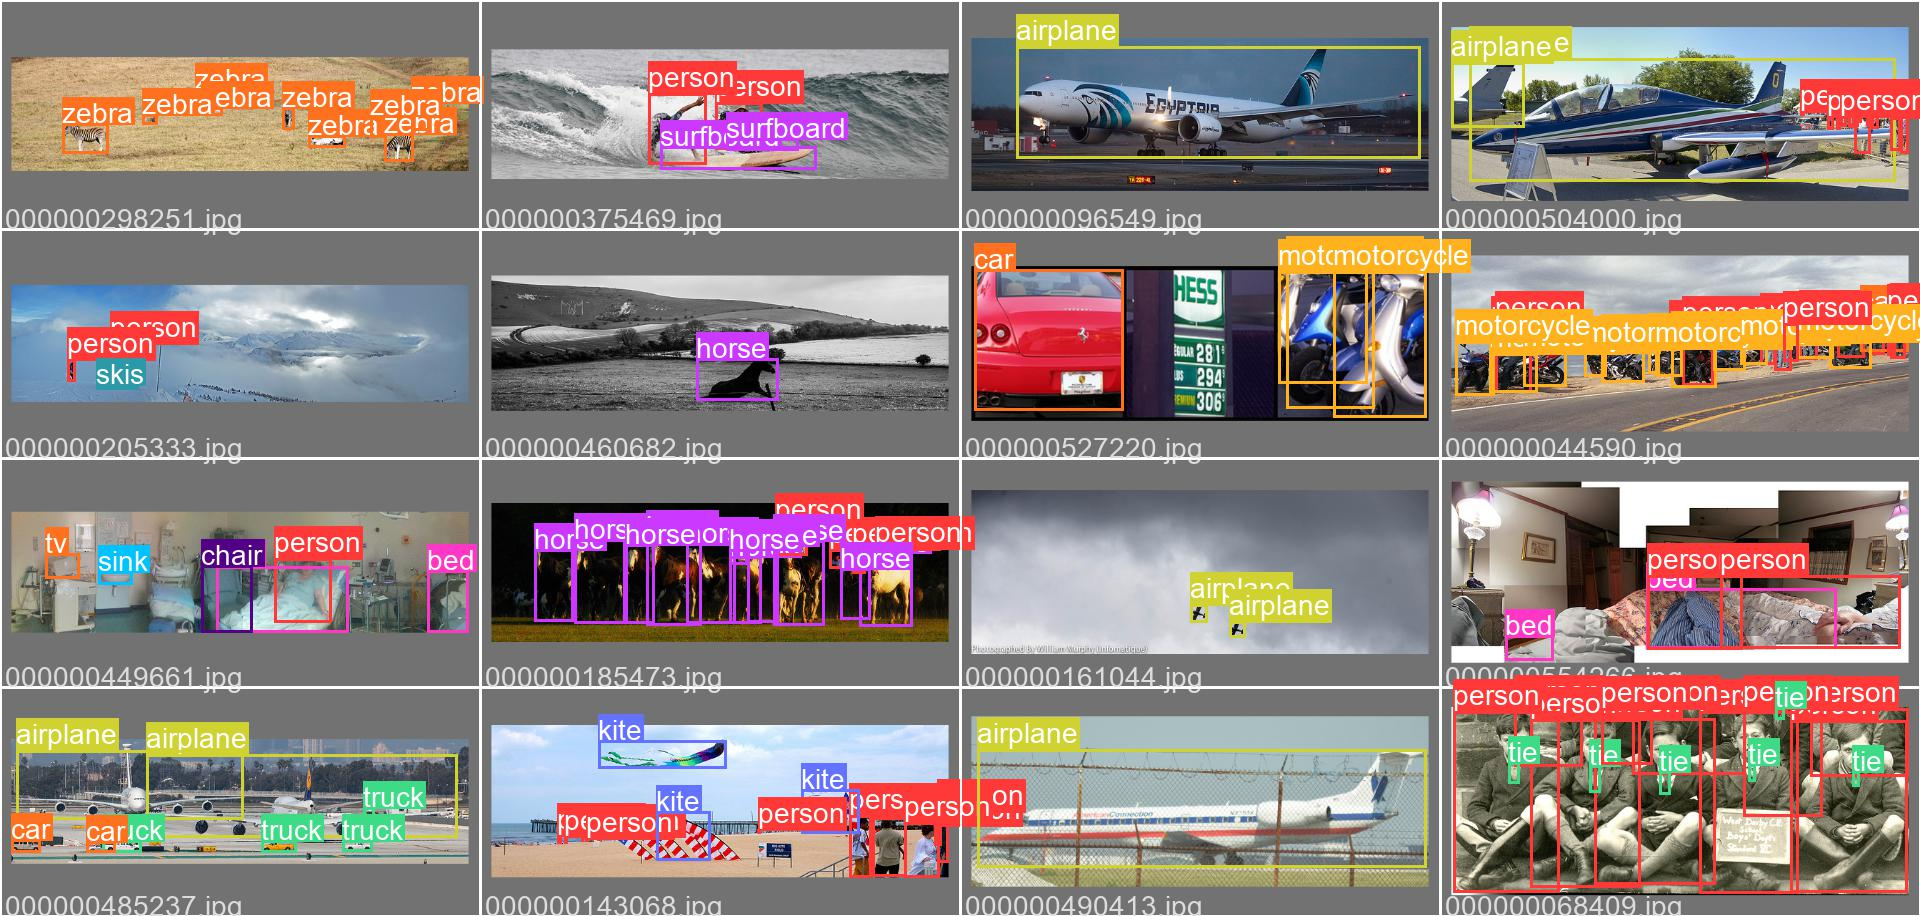

In [11]:
display.Image(filename='/content/yolov5/runs/val/exp/val_batch0_labels.jpg', width=1024)

## Тренировка
Для обучения воспользуемся подготовленным скриптом `train.py`.
<ul>
<li> <b> путь начальных весов: </b> `--weights`, по умолчанию = ROOT/'yolov5s.pt'

<li> <b> путь к model.yaml для конфигурации: </b> `--cfg` default = ''

<li> <b> путь к dataset.yaml: </b> `--data`, по умолчанию = ROOT / 'data / coco128.yaml'

<li> <b> путь к конфигурации гиперпараметров: </b> `--hyp`, по умолчанию = ROOT / 'data / hyps / hyp.scratch.yaml'

<li> <b> количество эпох: </b> `--epochs`, по умолчанию = 300

<li> <b> общий размер пакета для всех графических процессоров: </b> `--batch-size` по умолчанию = 16, -1 для автоподбора

<li> <b> тренировка, размер изображения val (в пикселях): </b> `--imgsz`,` --img`, `--img-size`, по умолчанию = 640

<!-- <li> <b> прямоугольное обучение: </b> `--rect`, action = 'store_true' -->

<!-- <li> <b> возобновить последнее обучение: </b> `--resume`, nargs = '?', const = True, default = False -->

<!-- <li> <b> сохранить только последнюю контрольную точку: </b> `--nosave`, action = 'store_true' -->

<!-- <li> <b> проверять только последнюю эпоху: </b> `--noval`, action = 'store_true' -->

<!-- <li> <b> отключить автоматическую проверку привязки: </b> `--noautoanchor`, action = 'store_true' -->
  
<!-- <li> <b> развивать гиперпараметры для поколений x: </b> `--evolve`
 nargs = '?', const = 300, -->

<!-- <li> <b> сегмент gsutil: </b> `--bucket`, default = '' -->

<!-- <li> <b> кэшировать изображения в "ram" (по умолчанию) или "disk": </b> `--cache`, nargs = '?', const = 'ram'-->

<li> <b> использовать взвешенный выбор изображений для обучения: </b> `--image-weights`, action = 'store_true`

<!-- <li> <b> устройство cuda, т.е. 0 или 0,1,2,3 или cpu: </b> `--device`, default = '', -->

<!-- <li> <b> варьировать размер изображения +/- 50%: </b> `--multi-scale`, action = 'store_true' -->

<li> <b> обучать данные с несколькими классами как с одним классом: </b> `--single-cls`, action = 'store_true'

<!-- <li> <b> использовать оптимизатор torch.optim.Adam (): </b> `--adam`, action = 'store_true' -->

<!-- <li> <b> использовать SyncBatchNorm, доступно только в режиме DDP: </b> `--sync-bn`, action = 'store_true' -->
    
<!-- <li> <b> максимальное количество рабочих загрузчиков данных: </b> `--workers`, по умолчанию = 8 -->

<li> <b> сохранить в проект/имя: </b> `--project`, по умолчанию = ROOT/'run/train'

<li> <b> сохранить в проект/имя: </b> `--name`, default = 'exp'

<!-- <li> <b> существующий проект / имя в порядке, без увеличения: </b> `--exist-ok`, action = 'store_true' -->

<!-- <li> <b> четырехъядерный загрузчик данных: </b> `--quad`, action = 'store_true' -->

<!-- <li> <b> линейный LR: </b> `--linear-lr`, action = 'store_true' -->

<!-- <li> <b> Эпсилон сглаживания меток: </b> `--label-smoothing`, по умолчанию = 0,0 -->

<!-- <li> <b> EarlyStopping терпение (эпохи без улучшений): </b> `--patience`, default = 100 -->

<li> <b> Количество слоев для закрепления. backbone = 10, all = 24: </b> `--freeze`, по умолчанию = 0

<li> <b> Сохранять контрольную точку каждые x эпох (отключено, если <1): </b> `--save-period`, по умолчанию = -1

<!-- <li> <b> Параметр DDP, не изменять: </b> `--local_rank`, default = -1 -->

<!-- <li> <b> W&B (аргументы веса и смещения) Entity: </b> `--entity`, по умолчанию = None
<!-- 
<li> <b> W&B: загрузить набор данных как таблицу артефактов: </b> `--upload_dataset`, action = 'store_true' -->

<!-- <li> <b> W&B: установить интервал регистрации изображения ограничивающего прямоугольника: </b> `--bbox_interval`, по умолчанию = -1 -->

<!-- <li> <b> W&B: версия артефакта набора данных для использования: </b> `--artifact_alias`, default = 'latest' -> -->

* Примечание * <br> Вы можете найти остальные параметры в `train.py` в форме, подобном: <br>```parser.add_argument ('- freeze', default = 0, 'Number of Layers to freeze . backbone = 10, all = 24 ') ```


Например, мы обучим модель YOLOv5s на наборе данных COCO128 с помощью `--data` `coco128.yaml`,  с предобученными весами  `--weights yolov5s.pt` со спецификацией, определенной в файле `--cfg 'yolov5s.yaml`.

<em> Примечание </em> <ul>
<li> <b> Результаты обучения </b> сохраняются в <code> 'run/train/' </code> с увеличением номера каталогов, например, <code> 'run/train/exp2', 'run/train/exp3'</code> и т. д.

In [2]:
# # Tensorboard  (optional)
# %load_ext tensorboard
# %tensorboard --logdir runs/train

In [1]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --cache

python3: can't open file 'train.py': [Errno 2] No such file or directory


### Упражнение 1.
1. Проверьте производительность(точность) дообученной модели на наборе валидационных данных.
2. Найдите и проверьте графические результаты обучения (`results.png`).
3. Проверьте производительность модели Yolov5 nano для набора данных `COCO128`, сравните метрику `mAP @ .5` для модели small и nano
4. Попробуйте обучить модель yolo nano с нуля (без предобченных весов) с минимум 100 эпохами обучения для задачи `COCO128`.
5. Проверьте производительность обученной модели на валидационных данных.
<!-- 6. Try to train the nano model with the  -->

### Упражнение 2.
1. Попробуйте обучить модель YOLO small (предобученную) с помощью следующего пользовательского набора данных.
```python
! wget https://raw.githubusercontent.com/shitkov/signature_detector/main/dataset.zip
! распаковать dataset.zip
display.clear_output ()
```
Используйте размер изображения 640, размер батчв 16, количество эпох 100.
*Примечание* данные в обучении должны быть указаны как файл `.yaml`, например `'/content/yolov5/dataset/sig.yaml'`
2. Проверьте результаты в для валидационных данных.

### Упражнение 3. Продвинутый уровень (не обязательное).
1. Изучите, как обучить YOLO на пользовательских данных, используя, например,
* это руководство https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/?ref=ultralytics
* или этот блокнот https://colab.research.google.com/github/roboflow-ai/yolov5-custom-training-tutorial/blob/main/yolov5-custom-training.ipynb
* или это неофициальное руководство https://wandb.ai/onlineinference/YOLO/reports/YOLOv5-Object-Detection-on-Windows-Step-By-Step-Tutorial---VmlldzoxMDQwNzk4
* или этот блокнот https://colab.research.google.com/drive/1gDZ2xcTOgR39tGGs-EZ6i3RTs16wmzZQ#scrollTo=SDIhrBF0sPaM

2. Также ознакомьтесь с официальной вики-страницей YOLO https://github.com/ultralytics/yolov5/wiki.